## Task 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_csv("appointment_data.csv")
print("Dataset shape:", df.shape)

print(df.head())
df.info()
print(df.describe())


Dataset shape: (5000, 18)
   PatientID  AppointmentID  Gender  Age Neighborhood  Scholarship  \
0        861              1  Female   28     Westside            0   
1       1295              2  Female   71     Eastview            0   
2       1131              3    Male   32    Hillcrest            1   
3       1096              4  Female   34    Southpark            0   
4       1639              5    Male   30    Pinegrove            0   

   Hypertension  Diabetes  Alcoholism  Disability  SMS_received  \
0             0         0           0           1             0   
1             0         0           0           0             1   
2             0         0           1           0             0   
3             0         0           0           0             0   
4             1         0           0           0             0   

  AppointmentDay ScheduledDay  DayOfWeek AppointmentTime  WaitingTime  \
0     2023-11-29   2023-11-20  Wednesday           15:00            9   
1   

Should get rid of NaN value and also encode variables into on-hot code. Do not forget to extracted needed form of data from Datetype data 

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Missing values in each column:
 PatientID          0
AppointmentID      0
Gender             0
Age                0
Neighborhood       0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Disability         0
SMS_received       0
AppointmentDay     0
ScheduledDay       0
DayOfWeek          0
AppointmentTime    0
WaitingTime        0
PreviousNoShows    0
NoShow             0
dtype: int64
Number of duplicate rows: 0


Thanks for clear data

In [ ]:
# Convert date/time columns
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentTime'] = pd.to_datetime(df['AppointmentTime'], format='%H:%M').dt.time

df['AppointmentHour'] = pd.to_datetime(df['AppointmentTime'].astype(str)).dt.hour

/var/folders/0_/m6w6nl357wdbcxwygh_9cc800000gn/T/ipykernel_49524/2713586665.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['AppointmentHour'] = pd.to_datetime(df['AppointmentTime'].astype(str)).dt.hour


In [ ]:
categorical_cols = ['Gender', 'Neighborhood']
if df['DayOfWeek'].dtype == 'object':
    categorical_cols.append('DayOfWeek')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Columns after encoding:", df.columns)


Columns after encoding: Index(['PatientID', 'AppointmentID', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Disability', 'SMS_received',
       'AppointmentDay', 'ScheduledDay', 'AppointmentTime', 'WaitingTime',
       'PreviousNoShows', 'NoShow', 'AppointmentHour', 'Gender_Male',
       'Neighborhood_Eastview', 'Neighborhood_Hillcrest',
       'Neighborhood_Maplewood', 'Neighborhood_Northend',
       'Neighborhood_Oakdale', 'Neighborhood_Pinegrove',
       'Neighborhood_Riverside', 'Neighborhood_Southpark',
       'Neighborhood_Westside', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday'],
      dtype='object')


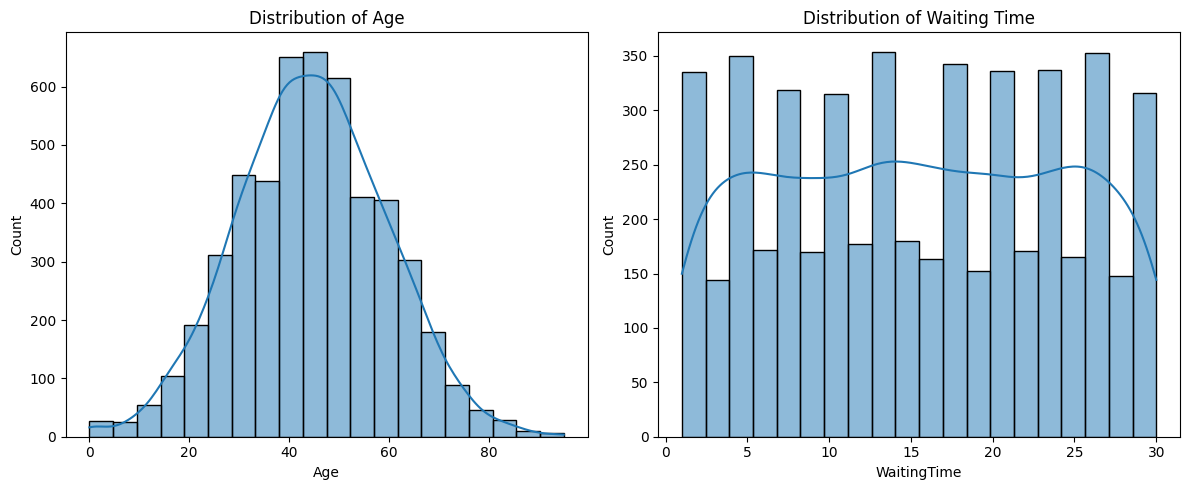

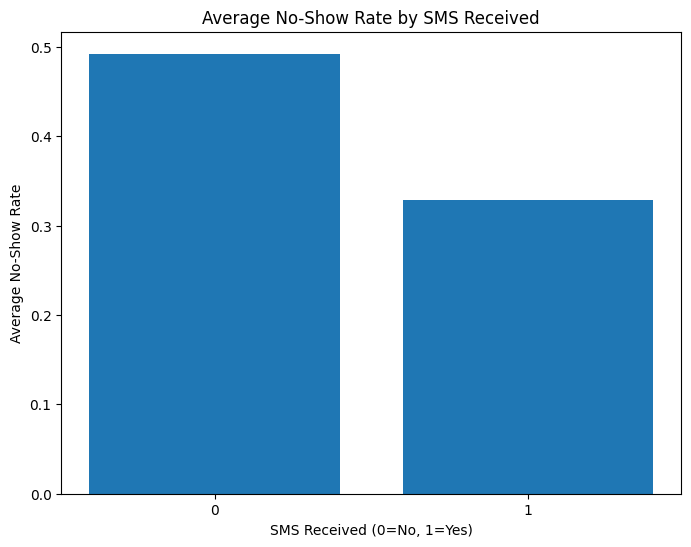

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.subplot(1, 2, 2)
sns.histplot(df['WaitingTime'], bins=20, kde=True)
plt.title("Distribution of Waiting Time")
plt.tight_layout()
plt.show()

sms_noshow = df.groupby('SMS_received')['NoShow'].mean()
plt.figure(figsize=(8,6))
plt.bar(sms_noshow.index.astype(str), sms_noshow.values)
plt.title("Average No-Show Rate by SMS Received")
plt.xlabel("SMS Received (0=No, 1=Yes)")
plt.ylabel("Average No-Show Rate")
plt.show()


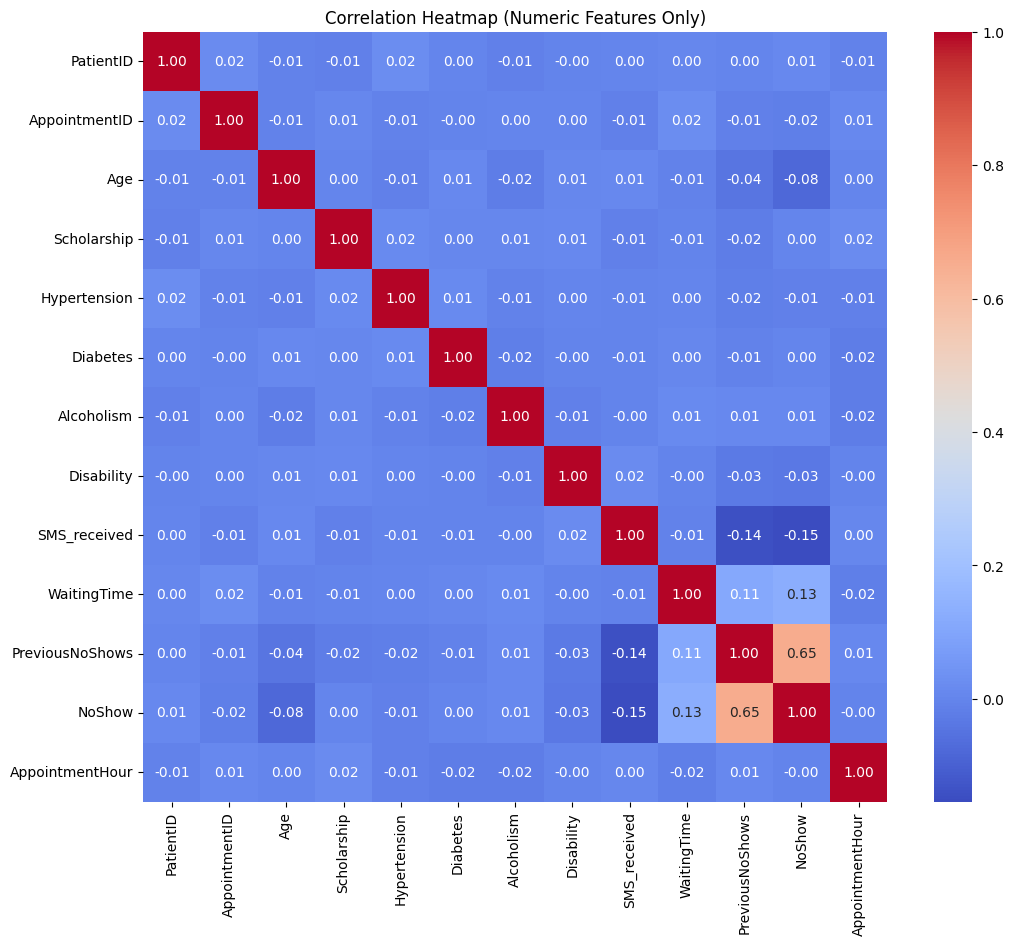

In [31]:

# Use numeric columns for the correlation heatmap to avoid errors with non-numeric types
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


# 2 Developing Model

In [ ]:
data = df.copy()

# 1. Drop unique ID columns as we do not need does
columns_to_drop = ['PatientID', 'AppointmentID']
for col in columns_to_drop:
    if col in data.columns:
        data.drop(columns=[col], inplace=True)

# 2. Drop raw date/time columns, we already formated the way we need the datetype data
raw_time_cols = ['AppointmentDay', 'ScheduledDay', 'AppointmentTime']
for col in raw_time_cols:
    if col in data.columns:
        data.drop(columns=[col], inplace=True)

# 3. The data is clear and alright, but once again check for any invalid ages and overall absurd outliers
data = data[(data['Age'] >= 0) & (data['Age'] < 120)]

# 4. Define X and y
y = data['NoShow']
X = data.drop(columns=['NoShow'])


# 5. Final check of columns
print("Final feature columns:\n", X.columns)
print("Shape of feature matrix:", X.shape)
print("Shape of target vector:", y.shape)


Final feature columns:
 Index(['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism',
       'Disability', 'SMS_received', 'WaitingTime', 'PreviousNoShows',
       'AppointmentHour', 'Gender_Male', 'Neighborhood_Eastview',
       'Neighborhood_Hillcrest', 'Neighborhood_Maplewood',
       'Neighborhood_Northend', 'Neighborhood_Oakdale',
       'Neighborhood_Pinegrove', 'Neighborhood_Riverside',
       'Neighborhood_Southpark', 'Neighborhood_Westside', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday'],
      dtype='object')
Shape of feature matrix: (5000, 26)
Shape of target vector: (5000,)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=45, 
    stratify=y
)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Logistic Regression Performance:
Accuracy: 0.806
Precision: 0.732824427480916
Recall: 0.7639257294429708
F1-score: 0.7480519480519481
ROC-AUC: 0.8887389247714702

Random Forest Performance:
Accuracy: 0.823
Precision: 0.8048780487804879
Recall: 0.7002652519893899
F1-score: 0.7489361702127659
ROC-AUC: 0.8711718347518425


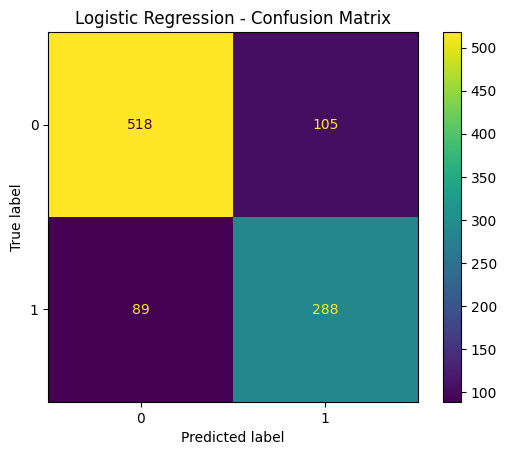

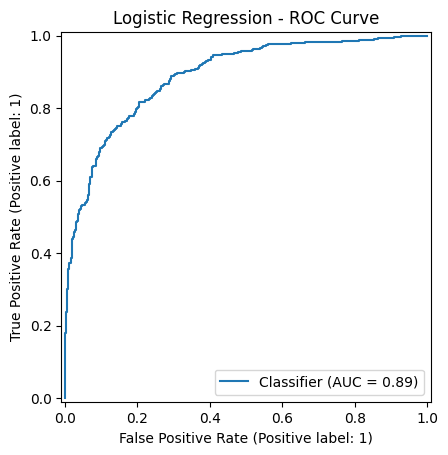

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve for Logistic Regression
RocCurveDisplay.from_predictions(y_test, y_prob_lr)
plt.title("Logistic Regression - ROC Curve")
plt.show()


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = RandomForestClassifier(random_state=45, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    scoring='f1',     
    cv=5,             
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]

print("\nBest RF Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1-score:", f1_score(y_test, y_pred_best_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best_rf))


Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.7493458475800987

Best RF Performance on Test Set:
Accuracy: 0.82
Precision: 0.797583081570997
Recall: 0.7002652519893899
F1-score: 0.7457627118644068
ROC-AUC: 0.8828803896607074


##### Confusion Matrix (Logistic Regression)
You shared the confusion matrix for Logistic Regression:

True Negatives (518): Correctly predicted “Show” when they actually showed.\
False Positives (105): Predicted “No-Show,” but the patient actually showed.\
False Negatives (89): Predicted “Show,” but the patient actually no-showed.\
True Positives (288): Correctly predicted “No-Show.”\
From this matrix:

Precision (~73%): Out of all predicted no-shows (288 + 105 = 393), about 73% are true no-shows.\
Recall (~76%): Out of the actual no-shows (288 + 89 = 377), the model catches ~76%.


##### ROC Curve (Logistic Regression)
The ROC curve shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) at various classification thresholds. An AUC of 0.8887 indicates that logistic regression does a good job separating no-shows from shows overall.


##### Comparative Analysis
Accuracy

Random Forest models (both baseline and tuned) show a slightly higher accuracy (82–82.3%) compared to Logistic Regression (80.6%).

Precision vs. Recall

Logistic Regression has higher recall (76.4% vs. ~70% for Random Forest), meaning it identifies a larger fraction of actual no-shows. This can be important if your main goal is to minimize missed no-shows else fewer false negatives.\
Random Forest has higher precision (about 80% vs. 73% for Logistic Regression), meaning when it predicts “no-show,” it is more likely to be correct. This can be important if your main goal is to avoid labeling a patient as no-show when they are actually going to show up else fewer false positives.

F1-score

The F1-scores are very close across models (all around 0.74–0.75), indicating a similar balance between precision and recall overall.

ROC-AUC

Logistic Regression’s AUC (0.8887) is slightly higher than the baseline Random Forest (0.8712), but the tuned Random Forest improves to 0.8829, nearly matching logistic regression.

Interpretability vs. Complexity

Logistic Regression is more interpretable (coefficients directly show how features affect the odds of no-show).\
Random Forest can capture more complex patterns but is less transparent. The feature importance plot helps, but it’s not as straightforward as logistic regression’s coefficients.


##### Practical Considerations
Choosing Logistic Regression:

You want to catch as many no-shows as possible (higher recall).\
You value model simplicity and interpretability (easier to explain to stakeholders).

Choosing Random Forest:

You prefer fewer false positives (higher precision).\
You’re comfortable with a more complex model for a slight boost in accuracy and can handle partial interpretability via feature importances.
Threshold Tuning:

Instead of relying on the default 0.5 probability threshold, you can adjust it to find a better balance between precision and recall.
For instance, if the cost of missing a no-show (false negative) is very high, you might lower the threshold to improve recall.


##### Final Insights
Model Performance: Both models perform well, with Logistic Regression having a higher recall and Random Forest providing a higher overall accuracy and precision. The F1-scores are quite similar.

Actionable Recommendation:\
If clinic wants to minimize the chance of missing an actual no-show, logistic regression might be slightly better out of the box.\
If clinic wants to minimize the false alarms (predicting no-show when they actually show), Random Forest is preferable.

Next Steps:\
Threshold Tuning: Evaluate the precision-recall trade-off at different probability thresholds.\
Cost-Benefit Analysis: Incorporate real-world costs (e.g., empty slots vs. staff overhead) to decide which errors are more tolerable.\
Further Data Collection: Gather additional features (e.g., distance to clinic, transportation access, etc.) that could improve predictive power.

# Task 3

In [ ]:
importances = best_rf.feature_importances_
feature_names = X.columns 

feat_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feat_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feat_importances.head(10))


                   feature  importance
8          PreviousNoShows    0.783366
6             SMS_received    0.067443
7              WaitingTime    0.045847
0                      Age    0.036786
9          AppointmentHour    0.011856
17  Neighborhood_Riverside    0.004500
24       DayOfWeek_Tuesday    0.003601
25     DayOfWeek_Wednesday    0.003486
2             Hypertension    0.003361
22        DayOfWeek_Sunday    0.003345


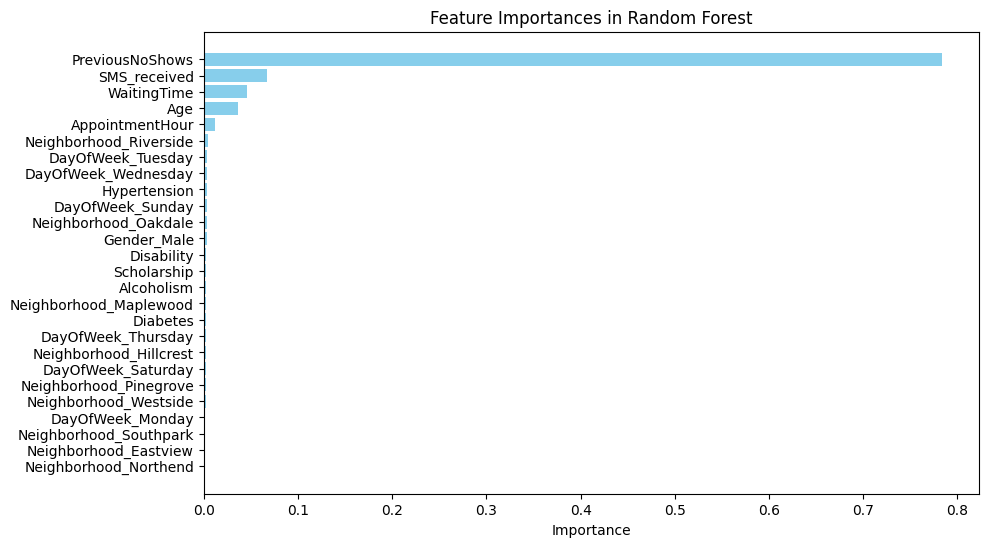

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['feature'], feat_importances['importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

PreviousNoShows Dominates

The bar for PreviousNoShows is significantly larger than all other features, indicating that a patient’s history of missing appointments is the strongest predictor of whether they will miss future appointments.

SMS Reminders and Waiting Time

Next in importance are SMS_received and WaitingTime.

SMS_received suggests that sending a reminder has a notable impact on whether a patient will attend or not.\
WaitingTime indicates that the longer a patient waits between scheduling and the appointment date, the more likely they are to miss the appointment.

Age and Appointment Hour

These also play a role, though not as large as the top three.\
Age may capture trends in no-shows among certain age groups (e.g., very young or older patients might have higher or lower no-show rates).\
AppointmentHour could reflect whether certain times of day are less convenient for some patients.

Neighborhood and Day of Week

Several neighborhood indicators and specific weekdays appear next.\
This suggests location-based factors (e.g., transportation issues, distance) and certain days of the week (e.g., weekends vs. weekdays) might influence attendance.
Clinical/Health Factors

Features like Hypertension, Disability, Diabetes, and Alcoholism have relatively smaller contributions in this chart, but they still may have some predictive power.
Overall, patients with a history of missing appointments are by far the highest-risk group for future no-shows, and logistical factors (reminders, scheduling lead time, time of day) also play a critical role. This insight can help the clinic target high-risk patients (those with multiple no-shows), improve reminder systems, and optimize scheduling (shorter waiting times, convenient appointment hours) to reduce the no-show rate.